<a href="https://colab.research.google.com/github/hylinux1024/ml-intro-final-project/blob/main/ml_final_project_5509.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classification

**Goal:** The task is to classify the handwritten digits using ML model. This is supervised learning problem,we going to use SVM to classify the handwrittern digits from 0-9. This type of learning is very common in pratical scene such as recognize telephone number or postal number in express divery. I think this task is also a good way to understand the machine learning algorithm.      
**Data:** The dataset is from https://www.openml.org/d/554, its can be load by **sklearn.datasets.fetch_openml** module.  
Each image of the MNIST dataset is 28 x 28 pixel image, it has 784 features. The data size of the dataset is 70000. Each pixel has a value between 0 and 255.    
First,we import libs nesscessary.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


### 1. Load data

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

### 2. Expore the data

#### See how many instances and features

In [3]:
X.shape

(70000, 784)

#### Display the data

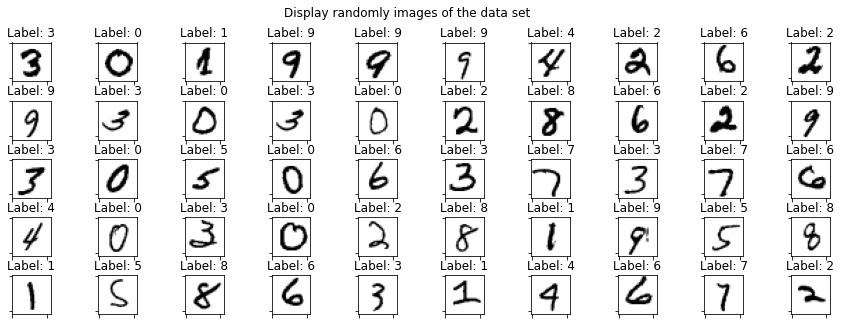

In [4]:
# the function to plot the data 
def displayData(X,Y):
    # display 5x10 images
    nrows = 5
    ncols = 10
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,5))
    fig.suptitle( "Display randomly images of the data set")
    # loop over randomly drawn numbers
    for i in range(nrows):
        for j in range(ncols):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(28,28)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray_r') # display it as gray colors.
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(X,y) 

#### Preprocessing data

In [5]:
# Each image of the MNIST dataset is 28 x 28 pixel image, it has 784 features, 
# Each pixel has a value between 0 and 255,which is the grey-value
# The target of the mnist is digit from 0-9,which type is string object. 
display(X[3:])
display(y)
print('pixel value:',(X.min(),X.max()))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

pixel value: (0.0, 255.0)


In [6]:
# normalize X to 0-1
# convert target to int64 type
# normalization usually good for the training perfermance.
n_samples = len(X)
# X = X.reshape((n_samples, -1))
X /= 255.0
y = y.astype('int64')
display(X,y)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([5, 0, 4, ..., 4, 5, 6])

#### Spilt the data into train and test set

In [7]:
# set test_size is 20% of the total size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=18)

print('X_train shape ',X_train.shape)
print('X_test shape ',X_test.shape)

X_train shape  (56000, 784)
X_test shape  (14000, 784)


#### Display the histgram to see the number's frequency in the train data

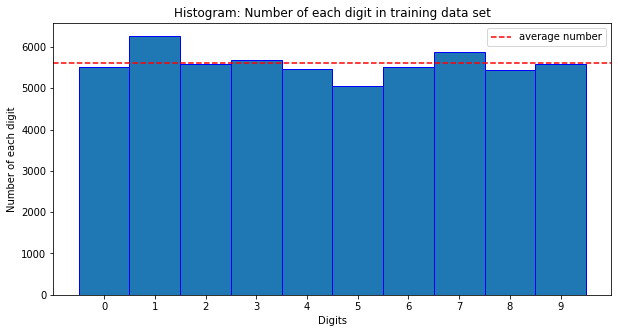

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.hist(y_train,bins=[0,1,2,3,4,5,6,7,8,9,10], edgecolor="b", histtype="bar",align='left')
ax.set_title('Histogram: Number of each digit in training data set')
ax.set(xlabel='Digits', ylabel='Number of each digit')
ax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9] );
ax.axhline(y=(y_train.size/10), label="average number",linestyle='dashed',   color='r')
ax.legend()

##### The distribution of each digit in the train set is balance, the frequency of each digit is almost 5800.  
We choose SVM to fit the data



### 3. Train the data

#### We use the SVM model to fit the data

In [9]:
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#### 3.1 First we use LinearSVC to fit the data and see the accuracy

In [10]:
# clf = SVC(C=1,kernel='linear',gamma=1)
clf = LinearSVC(dual=False)
# learn on the train subset
clf.fit(X_train, y_train)


LinearSVC(dual=False)

In [11]:
# predit on the test subset
y_pred = clf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('The accuracy of linearSVC score: ',score)

The accuracy of linearSVC score:  0.9138571428571428


the accuracy is 0.914, the score seem to pretty well on linear svc model,and the data seem to be linear seperated.

#### Next we see the confusion_matrix on LinearSVC

Text(0.5, 69.0, 'predicted label')

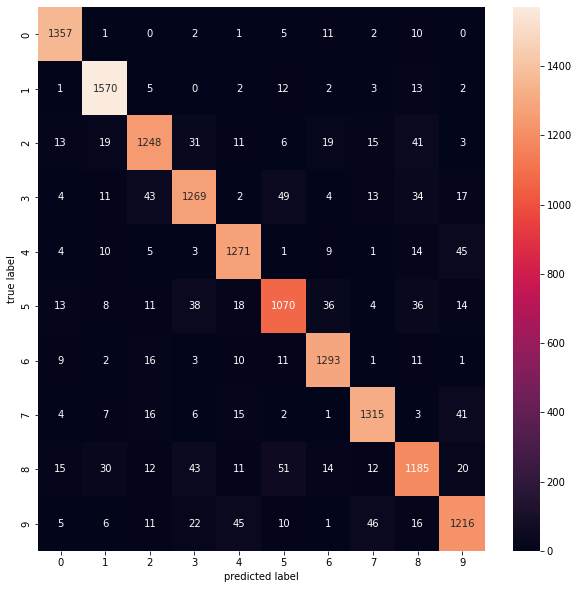

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
confusion_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))

sn.heatmap(confusion_matrix, annot=True, ax=ax, fmt='g',vmin=0)
ax.set_ylabel("true label")
ax.set_xlabel("predicted label")

#### 3.2 Second we use non-linear svc to fit the data and see the accuracy

In [13]:
svc = SVC(kernel='rbf')
# learn on the train subset
svc.fit(X_train, y_train)

SVC()

In [14]:
# predit on the test subset
y_pred_2 = svc.predict(X_test)
score = accuracy_score(y_test,y_pred_2)
print('The accuracy of non-linear-svc score: ',score)

The accuracy of non-linear-svc score:  0.9785


the accuracy is 0.9785,let see the confusion matrix on non-linear model  

Text(0.5, 69.0, 'predicted label using non-linear svc')

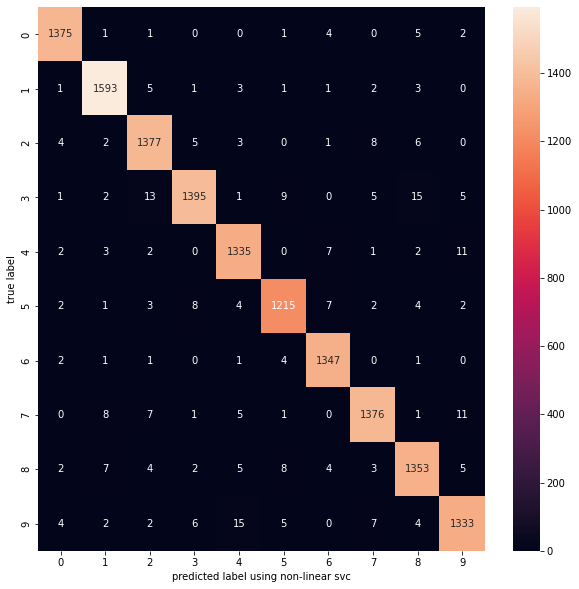

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
confusion_matrix = confusion_matrix(y_test, y_pred_2)
fig, ax = plt.subplots(figsize=(10,10))

sn.heatmap(confusion_matrix, annot=True, ax=ax, fmt='g',vmin=0)
ax.set_ylabel("true label")
ax.set_xlabel("predicted label using non-linear svc")

#### We want do better perfermance,let use GridSearchCV to find the best estimator.
This shell run will take a long running time, so i give up.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
# Use kfold cross-validation to find the best parameters
folds = KFold(n_splits = 5, shuffle = True, random_state = 18)
parameters = [{'gamma':[1e-2, 1e-3], 'C':[1, 3]}]
model = SVC(kernel='rbf')
grid = GridSearchCV(estimator=model, param_grid=parameters,scoring= 'accuracy',cv=folds,verbose=1,return_train_score=True)
grid.fit(X_train, y_train)
# print('grid serch score: ',score)

### Conclusion 
the accuracy achieve is 0.9785 using non-linear svc model, so the data is highly non-linear seperated.  
It can do beter if using GridSearchCV to find the best estimator,but the search have been taking a long running time in my laptop and did not train the 